## Diabetes Prediction Classification

### It is important to note that all the patients in this dataset are females

## Inspiration
- ### Can we build a machine learning model that can accurately predict whether or not the patients have diabetes.

### Features

1. Pregnancies: Number of times pregnant
2. Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
3. BloodPressure: Diastolic blood pressure (mm Hg)
4. SkinThickness: Triceps skin fold thickness (mm)
5. Insulin: 2-Hour serum insulin (mu U/ml)
6. BMI: Body mass index (weight in kg/(height in m)^2)
7. DiabetesPedigreeFunction: DiabetesPedigree Function
8. Age: Age(years)
9. Outcome: 1 means have diabetes, 0 means do not have diabetes

## The dataset is available through the UCI Machine Learning Repository who has also hosted it on the popular data science website Kaggle: https://www.kaggle.com/uciml/pima-indians-diabetes-database

### Importing the necessary libraries

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
sns.set()

## Reading in the data and initial analysis

In [2]:
data = pd.read_csv('diabetes.csv')

data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### From the onset we can see that there are a total of 9 features in this dataset and 768 observations. From the summary statistics table above, we can see that the average Glucose level is above 120, however, I suspect that it may be higher because there may be some 0 values. Even though at first glance, it appears that there are not any missing values, they may be listed as a 0 instead which we will have to deal with.

## Data cleaning and Exploratory Data Analysis

#### Renaming the columns, this is not strictly necessary, however, I just like to keep things snake case

In [5]:
data.columns = ['pregnancies', 'glucose', 'blood_pressure', 'skin_thickness', 'insulin', 'bmi',
               'diabetes_pedigree_function', 'age', 'outcome']

In [6]:
data.head()

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Is there a correlation between number of pregnancies and glucose levels?

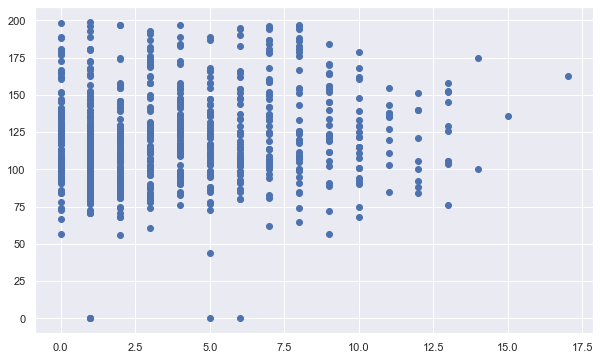

In [7]:
plt.figure(figsize=(10, 6))
plt.scatter(data['pregnancies'], data['glucose'])

Text(0.5, 1.0, 'Relationship between BMI and Glucose Level')

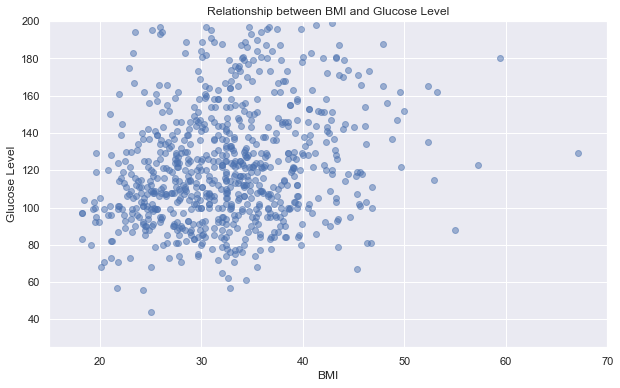

In [18]:
plt.figure(figsize=(10, 6))
plt.scatter(data['bmi'], data['glucose'], alpha=0.5)
plt.xlabel('BMI')
plt.ylabel('Glucose Level')
plt.xlim(15, 70)
plt.ylim(25, 200)
plt.title('Relationship between BMI and Glucose Level')

### Examining this relationship between BMI and Glucose Levels, there seems to be a hint of a linear relationship, however, it is weak. It is important to note that I have removed some outliers from consideration and adjusted the limits of the axes before displaying this chart. Also it does appear that a majority of the Glucose levels are between 80 and 160 and a majority of the BMI are between 20 and 40.

In [9]:
data.insulin.value_counts()

0      374
105     11
140      9
130      9
120      8
      ... 
271      1
270      1
108      1
112      1
846      1
Name: insulin, Length: 186, dtype: int64

### There seem to be alot values in the insulin column that are entered as a 0. This may have to be dealt with before we proceed with our model building.

Text(0.5, 1.0, 'Age Distribution')

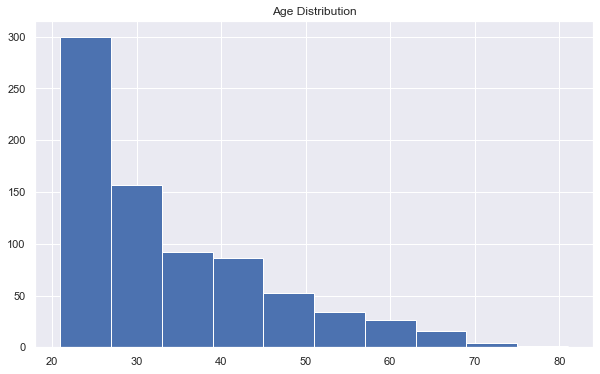

In [10]:
plt.figure(figsize=(10, 6))
data['age'].hist()
plt.title('Age Distribution')

### The age distribution histogram shows that a majority of people in this dataset are between the age of 20 and 40.

### KNN, k Nearest Neighbor Classification model. This is a classification model that we will be using in order to make our prediction.

In [13]:
# let's have a quick look at our data again

data.head(10)

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


### So there are several 0 values in the dataset which must be converted. One thing we could do is first convert the 0s to NaN via the numpy library and afterwards replace those with the mean of the column. As for values of glucose, insulin, we will have to scale those columns later on otherwise they are going to affect our model's performance.

In [14]:
cols = ['glucose', 'blood_pressure', 'insulin', 'bmi', 'skin_thickness']

for column in cols:
    data[column] = data[column].replace(0, np.nan)
    data[column] = data[column].replace(np.nan, data[column].mean())

In [15]:
data.head()

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age,outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   pregnancies                 768 non-null    int64  
 1   glucose                     768 non-null    float64
 2   blood_pressure              768 non-null    float64
 3   skin_thickness              768 non-null    float64
 4   insulin                     768 non-null    float64
 5   bmi                         768 non-null    float64
 6   diabetes_pedigree_function  768 non-null    float64
 7   age                         768 non-null    int64  
 8   outcome                     768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


### We can confirm now that the 0 values have been changed, and that the number of features in the dataset also remain intact.

Text(0.5, 0, 'BMI')

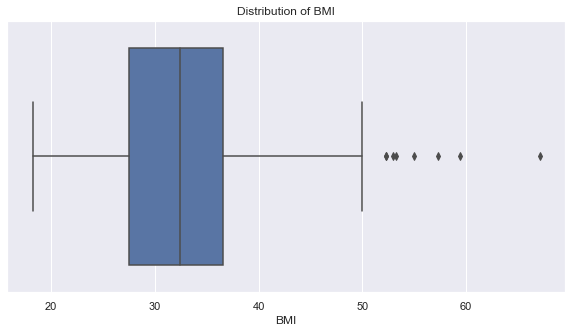

In [23]:
plt.figure(figsize=(10, 5))
sns.boxplot(data['bmi'])
plt.title('Distribution of BMI')
plt.xlabel('BMI')

### According to the boxplot above, a majority of the BMI of the people in the dataset is between 25 and 37 and we have  some outliers but not as much. However, BMI is significant in determining diabetes.

## Model Building

In [25]:
# splitting the dataset into training and test data

X = data.drop('outcome', axis=1)
y = data['outcome']

In [26]:
X.head()

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33


In [27]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: outcome, dtype: int64

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

In [29]:
# Feature Scaling

standard_scaler = StandardScaler()
X_train = standard_scaler.fit_transform(X_train)
X_test = standard_scaler.transform(X_test)

In [31]:
clf = KNeighborsClassifier(n_neighbors=11, p=2, metric='euclidean')

In [34]:
np.sqrt(len(y_test)) # The number for the nearest_neighbor is the sqrt of the length of data points, but if even, 
                    # we either subtract one or add one to keep it odd.

12.409673645990857

In [35]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='uniform')

In [36]:
y_pred = clf.predict(X_test)

y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [37]:
cm = confusion_matrix(y_test, y_pred)

print(cm)

[[94 13]
 [16 31]]


### The confusion matrix works in order of True Positive and False Positive in top row and False Negative and True Negative in the bottom row. Therefore, our classifier got 125 correct,

In [40]:
(125/154) * 100

81.16883116883116

In [41]:
print(accuracy_score(y_test, y_pred))

0.8116883116883117


In [42]:
print(f1_score(y_test, y_pred))

0.6813186813186813


### The f1_score is indicative that there are alot more false positives so it is more telling of how the model is performing overall.

In [43]:
clf = KNeighborsClassifier(n_neighbors=13, p=2, metric='euclidean')

In [44]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                     weights='uniform')

In [45]:
preds = clf.predict(X_test)

print(preds)

[1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0
 0 0 1 0 0 0 1 1 0 0 0 1 0 1 0 1 1 0 0 0 1 0 1 1 0 0 1 1 1 1 0 0 0 0 0 0 1
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 0 0 1 0
 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 0 0 0 0 0 0]


In [46]:
cm2 = confusion_matrix(y_test, preds)

print(cm2)

[[95 12]
 [16 31]]


In [47]:
print(accuracy_score(y_test, preds))

0.8181818181818182


In [48]:
print(f1_score(y_test, preds))

0.6888888888888888


### Increasing the n_neighbors helped slightly, but not that much.

In [49]:
from sklearn.linear_model import LogisticRegression

In [50]:
log_reg = LogisticRegression()

In [51]:
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [52]:
predictions = log_reg.predict(X_test)

print(predictions)

[1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0
 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 1
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0
 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 1 0 0]


In [53]:
cm3 = confusion_matrix(y_test, predictions)

print(cm3)

[[97 10]
 [19 28]]


In [54]:
print(accuracy_score(y_test, predictions))

0.8116883116883117


In [55]:
print(f1_score(y_test, predictions))

0.6588235294117647


### We also ended up using the logistic regression model as well, however it wasn't far superior than KNN in this instance. Of course this is all an iterative process, therefore, we can go back and clean the data some more, or tune the model to hone in on more accurate predictions.